# Первичный анализ и визуализация данных

In [32]:
import numpy as np
import pandas as pd

# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker
%matplotlib inline

In [33]:
df = pd.read_csv('data/mlbootcamp5_train.csv', sep=';', index_col='id')

In [34]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [35]:
# Группируем по полу - рост человека
print(df.groupby('gender')[['height']].agg(np.mean))

            height
gender            
1       161.355612
2       169.947895


In [36]:
# курящие женщины
smoke_women_num = len(df[(df['gender']==1) & (df['smoke']==1)])
print('smoke_women_num: ', smoke_women_num)

# всего женщин
women_num = len(df[(df['gender']==1)])
print('women_num: ', women_num)

smoke_women_num:  813
women_num:  45530


In [37]:
# Медианное значение возраста курящих
median_smoke_people = ((df[(df['smoke'] == 1)]['age']) / 365.25).median()

In [38]:
df['age_years'] = (round(df['age'] / 365.25))

# Курящие мужчины в возрасте [60; 64] лет.
smoke_men_60_64 = df[(df['gender']==2) & 
                     (df['smoke']==1) &
                     (df['age_years'] >= 60) &
                     (df['age_years'] <= 64)]

group1 = smoke_men_60_64[(smoke_men_60_64['cholesterol'] == 1) &
                         (smoke_men_60_64['ap_hi'] < 120)]

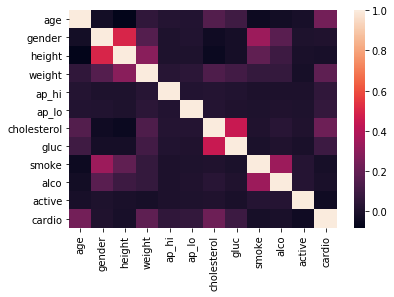

In [39]:
# Корреляция по Пирсону

train = pd.read_csv('data/mlbootcamp5_train.csv', sep=';', index_col='id')
sns.heatmap(train.corr(method='pearson'))

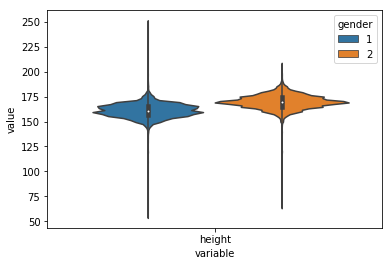

In [40]:
#Создаем датафрейм, основанный на данных о росте разных полов
df = pd.melt(train, value_vars=['height'], id_vars='gender')

#Выводим violinplot
sns.violinplot(x='variable', y='value', hue='gender', data=df) 

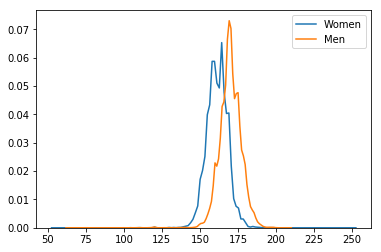

In [41]:
#Строим линию графика для женщин
sns.kdeplot(train[train['gender'] == 1]['height'], label='Women') 

#Строим линию графика для мужчин
sns.kdeplot(train[train['gender'] == 2]['height'], label='Men');  

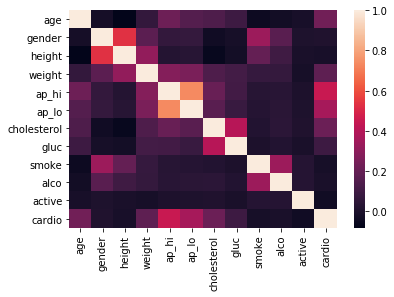

In [42]:
# Корреляция по Спирмену
sns.heatmap(train.corr(method='spearman'))

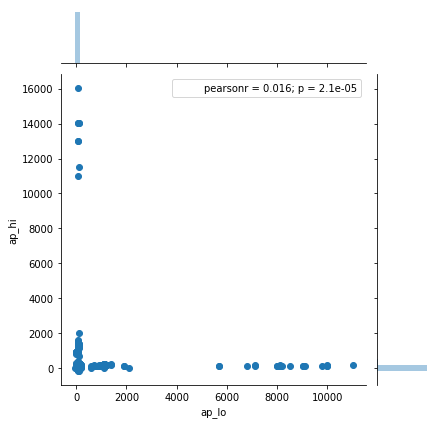

In [43]:
# Два наиболее коррелирующие между собой признаков (по Спирмену).
sns.jointplot(train.ap_lo, train.ap_hi)

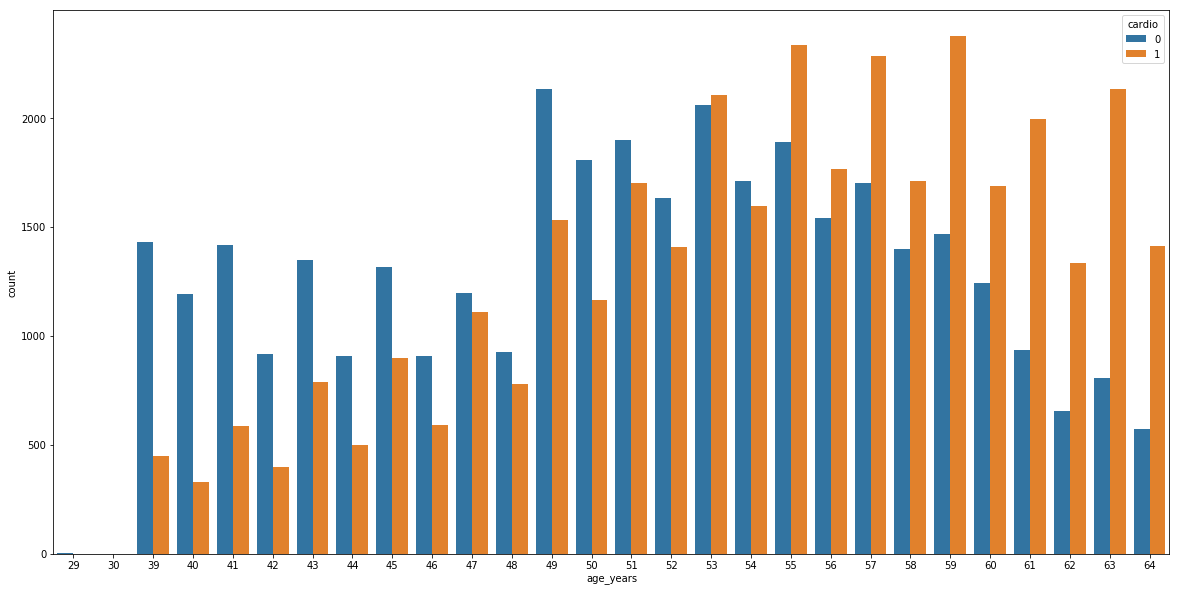

In [45]:
train['age_years'] = (train['age'] // 365.25).astype(int)   # возраст людей в годах (а было в днях)

plt.figure(figsize=(20,10))
sns.countplot(train['age_years'], hue=train['cardio'])